--2019-07-08 02:33:23--  https://www.pakutaso.com/shared/img/thumb/sopuIMG_3375_TP_V.jpg
Resolving www.pakutaso.com (www.pakutaso.com)... 180.235.251.31
Connecting to www.pakutaso.com (www.pakutaso.com)|180.235.251.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1241803 (1.2M) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]   1.18M  1.79MB/s    in 0.7s    

2019-07-08 02:33:24 (1.79 MB/s) - ‘test.jpg’ saved [1241803/1241803]



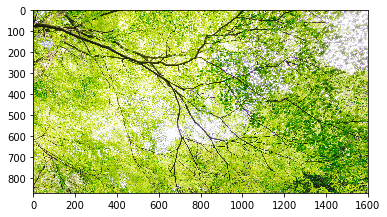

In [3]:
! wget https://www.pakutaso.com/shared/img/thumb/sopuIMG_3375_TP_V.jpg -O test.jpg
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('test.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
from keras.preprocessing import image
import numpy as np
filename = 'test.jpg'
model =VGG16(weights='imagenet')#学習済みモデル
img = image.load_img(filename,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
preds=model.predict(preprocess_input(x))#認識
results=decode_predictions(preds,top=5)[0]#結果取得
for result in results:
    print(result)

W0708 02:33:25.571320 139911948658560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 02:33:25.611297 139911948658560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 02:33:25.619327 139911948658560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 02:33:25.662125 139911948658560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



553467904/553467096 [==============================] - 6s 0us/step


W0708 02:33:32.391791 139911948658560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0708 02:33:32.393258 139911948658560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



40960/35363 [==================================] - 0s 0us/step
('n11879895', 'rapeseed', 0.27111176)
('n02793495', 'barn', 0.11463819)
('n03891251', 'park_bench', 0.0661071)
('n01770081', 'harvestman', 0.055902593)
('n02843684', 'birdhouse', 0.034378108)


In [5]:
#転移学習
from keras.datasets import cifar10
from keras.applications.vgg16 import VGG16
from keras.models import Sequential,Model
from keras.layers import Dense,Activation,Flatten,Input
from keras.layers import Convolution2D,MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
nb_classes = 10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
y_train=np_utils.to_categorical(y_train,nb_classes)
y_test=np_utils.to_categorical(y_test,nb_classes)
input_tensor=Input(shape=(32,32,3))
base_model=VGG16(include_top=False,weights='imagenet',input_tensor=input_tensor)
top_model =Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(nb_classes,activation='softmax'))
#base_modelとtop_modelを連結して1つのmodelにする
model=Model(inputs=base_model.input,outputs=top_model(base_model.output))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(x_train,y_train,validation_split=0.1,epochs=10,batch_size=50)

58892288/58889256 [==============================] - 1s 0us/step


W0708 02:33:46.692701 139911948658560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 02:33:46.805691 139911948658560 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 36s 795us/step - loss: 1.0339 - acc: 0.6411 - val_loss: 0.7525 - val_acc: 0.7410
Epoch 2/10
45000/45000 [==============================] - 34s 764us/step - loss: 0.5867 - acc: 0.7986 - val_loss: 0.5327 - val_acc: 0.8148
Epoch 3/10
45000/45000 [==============================] - 34s 756us/step - loss: 0.4544 - acc: 0.8424 - val_loss: 0.5147 - val_acc: 0.8178
Epoch 4/10
45000/45000 [==============================] - 34s 762us/step - loss: 0.3630 - acc: 0.8745 - val_loss: 0.5124 - val_acc: 0.8290
Epoch 5/10
45000/45000 [==============================] - 34s 761us/step - loss: 0.2875 - acc: 0.9005 - val_loss: 0.5143 - val_acc: 0.8272
Epoch 6/10
45000/45000 [==============================] - 34s 761us/step - loss: 0.2267 - acc: 0.9215 - val_loss: 0.4887 - val_acc: 0.8388
Epoch 7/10
45000/45000 [==============================] - 34s 759us/step - loss: 0.1810 - acc: 0.9374 - val_loss: 0.4